In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import RFE


In [148]:
df=pd.read_csv('Dataset salary 2024.csv')

In [149]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
16529,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
16530,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
16531,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
16532,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


**Target Value** in Predictive Modeling in this project, it would be **salary_in_usd**, and the other columns would serve as features (independent variables) to predict the salary.

#### **Data Struture**

In [150]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16534 non-null  int64 
 1   experience_level    16534 non-null  object
 2   employment_type     16534 non-null  object
 3   job_title           16534 non-null  object
 4   salary              16534 non-null  int64 
 5   salary_currency     16534 non-null  object
 6   salary_in_usd       16534 non-null  int64 
 7   employee_residence  16534 non-null  object
 8   remote_ratio        16534 non-null  int64 
 9   company_location    16534 non-null  object
 10  company_size        16534 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


In [152]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,16534.000000,1.653400e+04,16534.000000,16534.000000
mean,2023.226866,1.637270e+05,149686.777973,32.003750
std,0.713558,3.402057e+05,68505.293156,46.245158
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.017630e+05,101125.000000,0.000000
50%,2023.000000,1.422000e+05,141300.000000,0.000000
75%,2024.000000,1.872000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


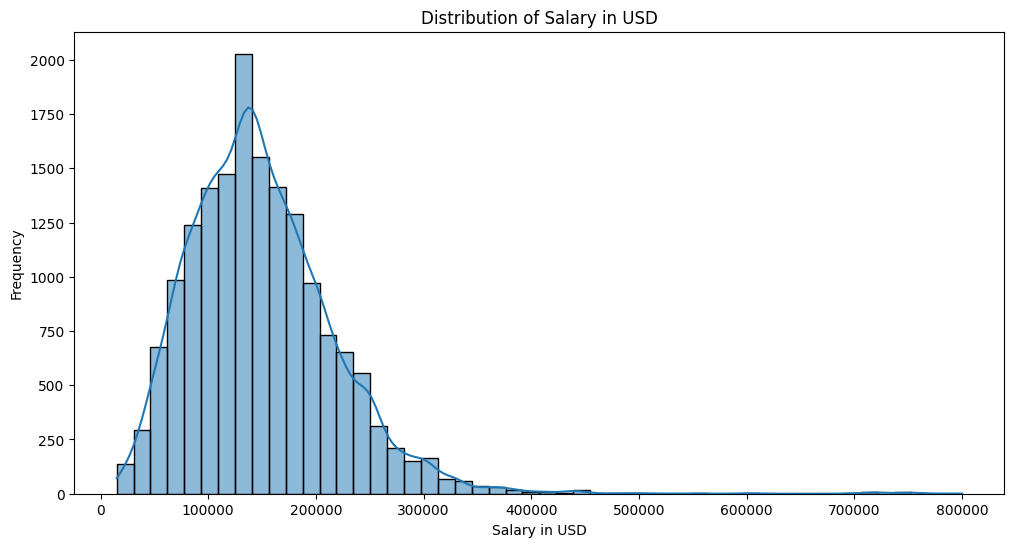

In [153]:
plt.figure(figsize=(12, 6))
sns.histplot(df['salary_in_usd'], bins=50, kde=True)
plt.title('Distribution of Salary in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()

**The histrogram shows that the distribution of salaries in USD is right-skewed, with most salaries clustering around the lower end and a long tail towards higher salaries**

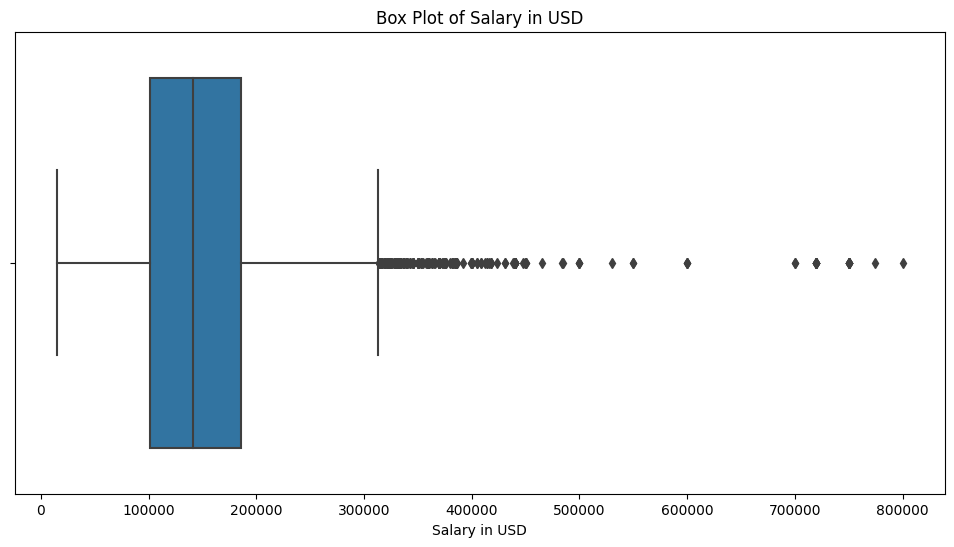

In [154]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['salary_in_usd'])
plt.title('Box Plot of Salary in USD')
plt.xlabel('Salary in USD')
plt.show()

#### **Unique in each column**

In [155]:
unique_values_counts = {}
for column in df.columns:
    unique_values_counts[column] = df[column].value_counts()
for column, values_counts in unique_values_counts.items():
    print(f"Unique values and counts for column '{column}':\n{values_counts}\n")


Unique values and counts for column 'work_year':
work_year
2023    8519
2024    6067
2022    1655
2021     218
2020      75
Name: count, dtype: int64

Unique values and counts for column 'experience_level':
experience_level
SE    10670
MI     4038
EN     1325
EX      501
Name: count, dtype: int64

Unique values and counts for column 'employment_type':
employment_type
FT    16454
PT       38
CT       28
FL       14
Name: count, dtype: int64

Unique values and counts for column 'job_title':
job_title
Data Engineer                    3464
Data Scientist                   3314
Data Analyst                     2440
Machine Learning Engineer        1705
Research Scientist                531
                                 ... 
Quantitative Research Analyst       1
AWS Data Architect                  1
Analytics Engineering Manager       1
Marketing Data Scientist            1
Applied Research Scientist          1
Name: count, Length: 155, dtype: int64

Unique values and counts for column 's

### **1. EDA**

#### **Salary Trend over the years**

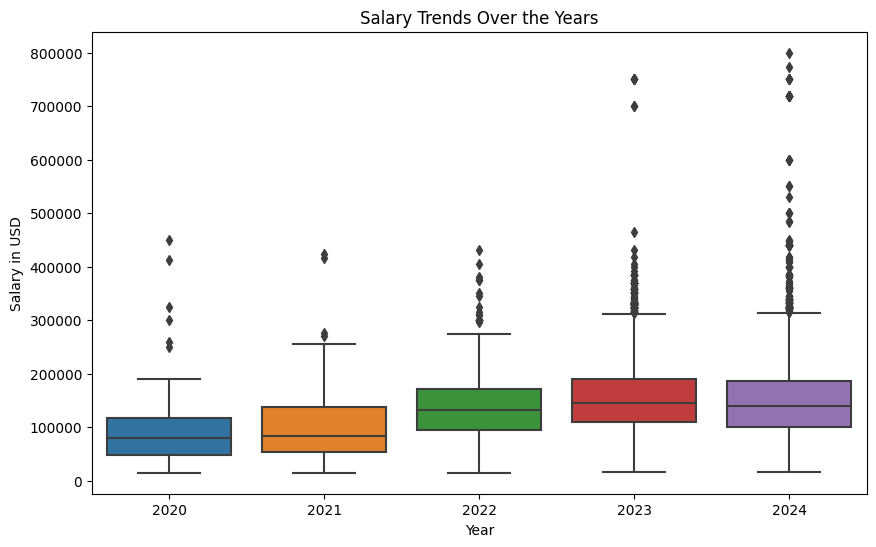

In [156]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='work_year', y='salary_in_usd', data=df)
plt.title('Salary Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Salary in USD')
plt.show()

#### **Compare Salaries by Experience Level**

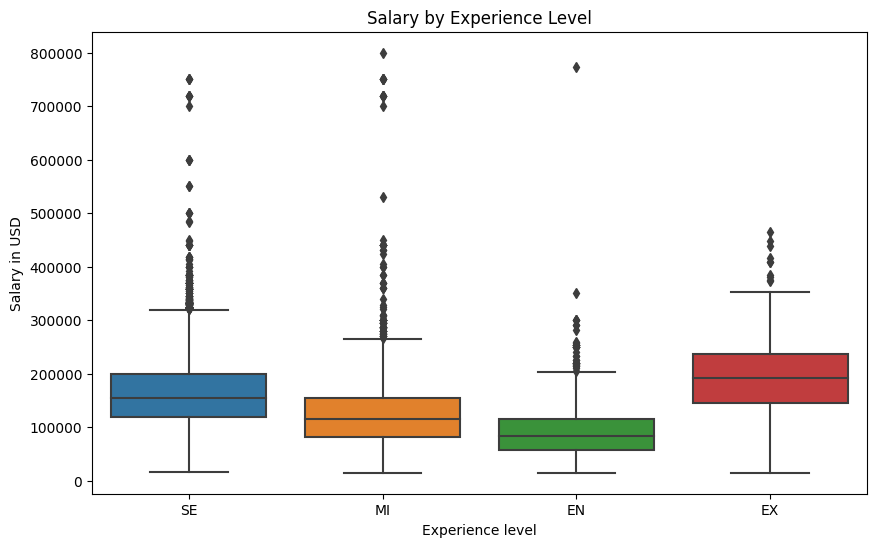

In [157]:
plt.figure(figsize=(10,6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.title('Salary by Experience Level')
plt.xlabel('Experience level')
plt.ylabel('Salary in USD')
plt.show()

#### **Compare Salaries by Employment Type**

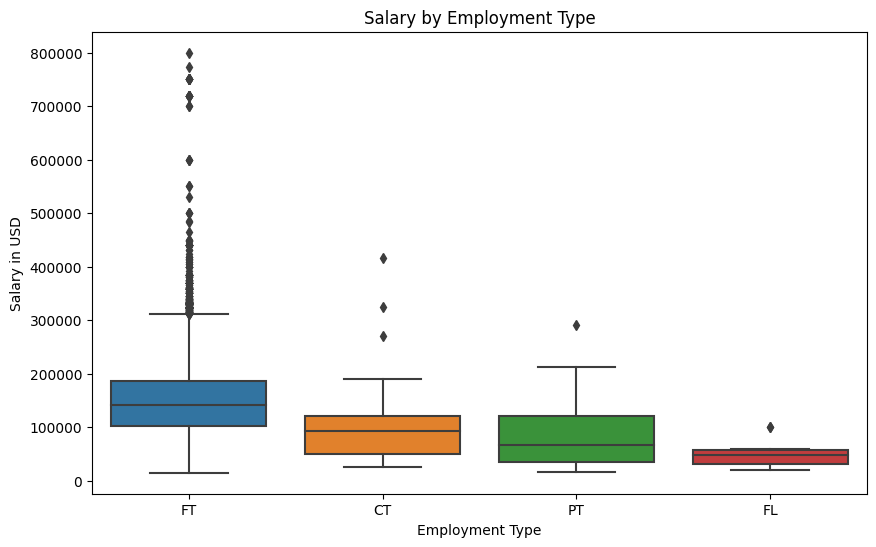

In [158]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='employment_type', y='salary_in_usd', data=df)
plt.title('Salary by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Salary in USD')
plt.show()


#### **Salaries by Job Title**

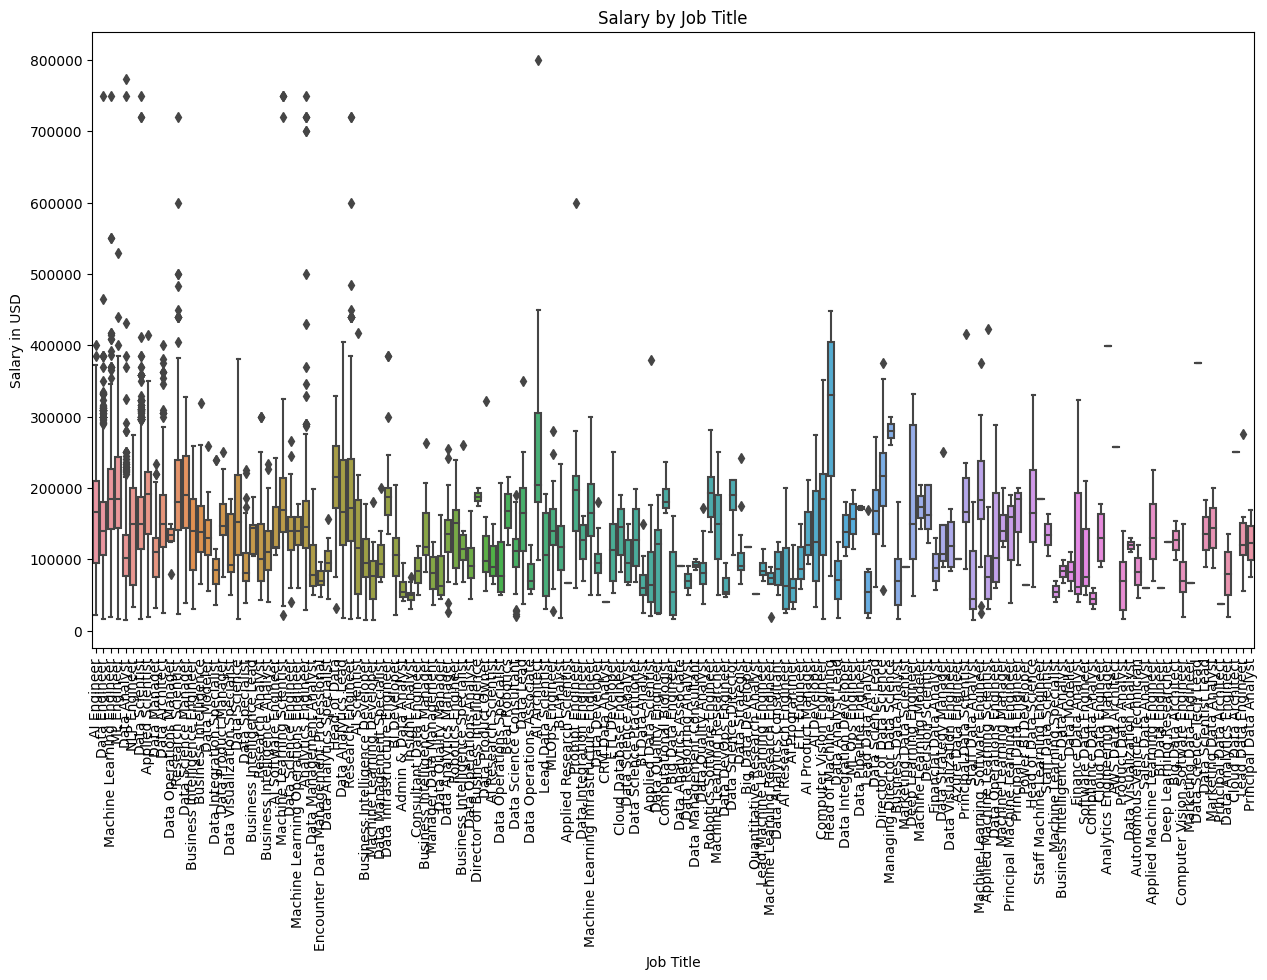

In [159]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='job_title', y='salary_in_usd', data=df)
plt.title('Salary by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Salary in USD')
plt.xticks(rotation=90)
plt.show()


#### **Salary by Remote Ratio**

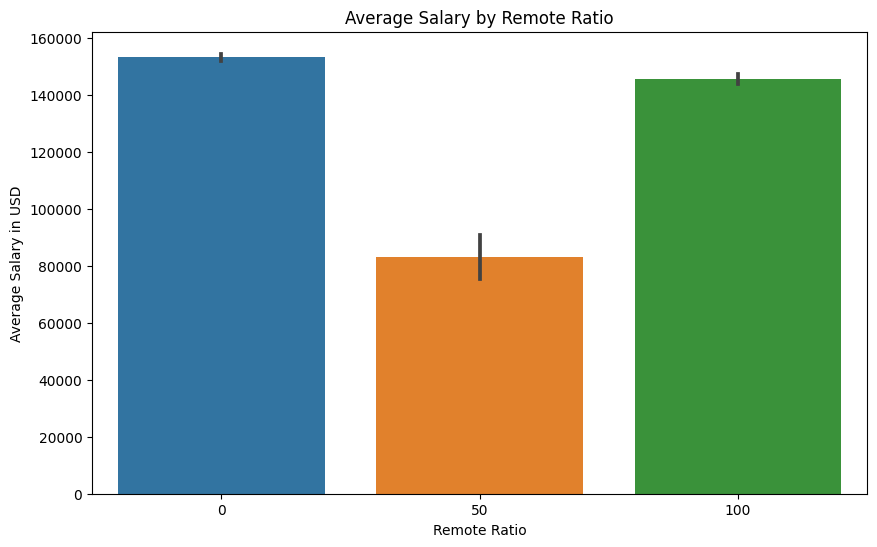

In [160]:
plt.figure(figsize=(10, 6))
sns.barplot(x='remote_ratio', y='salary_in_usd', data=df, estimator=lambda x: sum(x) / len(x))
plt.title('Average Salary by Remote Ratio')
plt.xlabel('Remote Ratio')
plt.ylabel('Average Salary in USD')
plt.show()


#### **Salaries by Company Size**

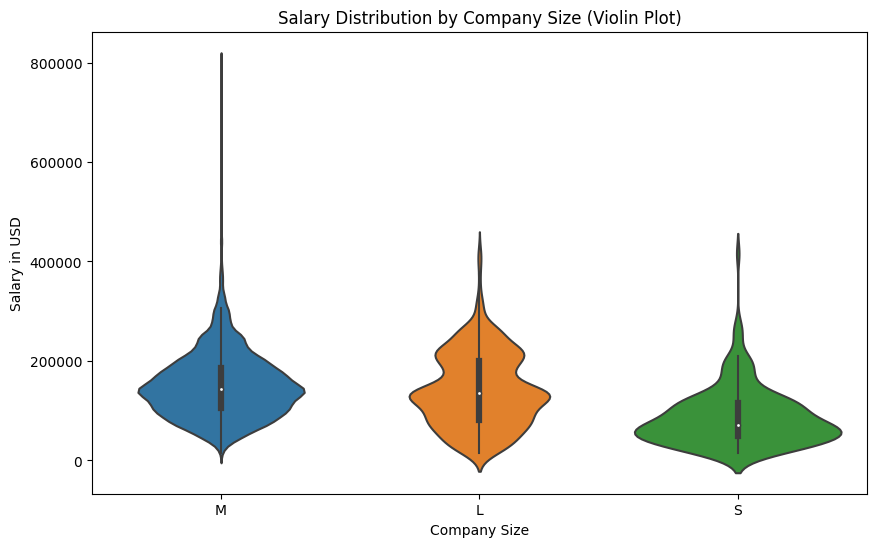

In [161]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='company_size', y='salary_in_usd', data=df)
plt.title('Salary Distribution by Company Size (Violin Plot)')
plt.xlabel('Company Size')
plt.ylabel('Salary in USD')
plt.show()


### **2. Data Preprocessing**

#### **Data Cleansing**

In [162]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


### **Data Preprocessing**

In [163]:
X=df.drop('salary_in_usd',axis=1)
y=df.salary_in_usd

In [164]:
categorical_features=X.select_dtypes(include=['object']).columns.tolist()
numerical_features=X.select_dtypes(include=[np.number]).columns.tolist()

In [165]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2


In [166]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42)
}

##### **Preprocess Data with One-Hot Encoding and Ordinal Encoding**

In [167]:
one_hot_preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

ordinal_preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', ordinal_encoder, categorical_features)])


In [168]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42)
}

In [169]:
results = {}

In [170]:
one_hot_results = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', one_hot_preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)
    y_val_pred = pipeline.predict(X_val)
    mae_val = mean_absolute_error(y_val, y_val_pred)
    y_test_pred = pipeline.predict(X_test)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    one_hot_results[name] = (mae_val, mae_test)

results['One-Hot Encoding'] = one_hot_results

In [171]:
ordinal_results = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', ordinal_preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)
    y_val_pred = pipeline.predict(X_val)
    mae_val = mean_absolute_error(y_val, y_val_pred)
    y_test_pred = pipeline.predict(X_test)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    ordinal_results[name] = (mae_val, mae_test)

results['Ordinal Encoding'] = ordinal_results

In [172]:
for encoding_method, encoding_results in results.items():
    print(f"Results for {encoding_method}:")
    for model_name, (mae_val, mae_test) in encoding_results.items():
        print(f"{model_name} - Validation MAE: {mae_val:.4f}, Test MAE: {mae_test:.4f}")

Results for One-Hot Encoding:
Linear Regression - Validation MAE: 31120.0904, Test MAE: 30993.5769
Random Forest - Validation MAE: 448.3888, Test MAE: 577.0142
Results for Ordinal Encoding:
Linear Regression - Validation MAE: 43121.4882, Test MAE: 45277.9733
Random Forest - Validation MAE: 424.4283, Test MAE: 534.4251


#### **Feature Selection**

In [176]:
best_encoding_preprocessor = ordinal_preprocessor
fs_results={}
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', best_encoding_preprocessor),
        ('feature_selection', RFE(model, n_features_to_select=10)),  # Number of features to select
        ('model', model)
    ])
    pipeline.fit(X_train, y_train)
    y_val_pred = pipeline.predict(X_val)
    mae_val = mean_absolute_error(y_val, y_val_pred)
    y_test_pred = pipeline.predict(X_test)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    fs_results[name] = (mae_val, mae_test)

print("Results after feature selection:")
for model_name, (mae_val, mae_test) in fs_results.items():
    print(f"{model_name} - Validation MAE: {mae_val:.4f}, Test MAE: {mae_test:.4f}")
    print(f"{model_name} - Validation MAE: {mae_val:.4f}, Test MAE: {mae_test:.4f}")

Results after feature selection:
Linear Regression - Validation MAE: 43121.4882, Test MAE: 45277.9733
Random Forest - Validation MAE: 424.4283, Test MAE: 534.4251


#### **Hyperparameter Tuning**

In [178]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

pipeline = Pipeline(steps=[
    ('preprocessor', ordinal_preprocessor),
    ('feature_selection', RFE(RandomForestRegressor(random_state=42), n_features_to_select=10)),
    ('model', RandomForestRegressor(random_state=42))
])

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

best_model = grid_search.best_estimator_


y_val_pred = best_model.predict(X_val)
mae_val = mean_absolute_error(y_val, y_val_pred)
y_test_pred = best_model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f"Validation MAE: {mae_val:.4f}")
print(f"Test MAE: {mae_test:.4f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found:  {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 300}
Validation MAE: 432.4502
Test MAE: 545.9182


#### **Cross-Validation**

In [180]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_model, X_train_val, y_train_val, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
cv_mae = -cv_scores.mean()

print(f"Cross-Validation MAE: {cv_mae:.4f}")

Cross-Validation MAE: 698.3694


#### **Extract feature importances from the Random Forest model**

In [182]:
feature_importances = best_model.named_steps['model'].feature_importances_

selected_features = [X.columns[i] for i in range(len(X.columns)) if best_model.named_steps['feature_selection'].support_[i]]

feature_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importances
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)


              Feature  Importance
1    experience_level    0.959193
6  employee_residence    0.028864
9        company_size    0.003450
7        remote_ratio    0.002594
8    company_location    0.002142
5     salary_currency    0.001125
0           work_year    0.000902
3           job_title    0.000733
4              salary    0.000623
2     employment_type    0.000374


In [188]:
from sklearn.metrics import mean_squared_error, r2_score

rmse_val = mean_squared_error(y_val, y_val_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

r2_val = r2_score(y_val, y_val_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Additional Results after feature selection:")
for model_name, (mae_val, mae_test) in fs_results.items():
    print(f"{model_name} - Validation MAE: {mae_val:.4f}, Test MAE: {mae_test:.4f}")
    print(f"{model_name} - Validation RMSE: {rmse_val:.4f}, Test RMSE: {rmse_test:.4f}")
    print(f"{model_name} - Validation R-squared: {r2_val:.4f}, Test R-squared: {r2_test:.4f}")

Additional Results after feature selection:
Linear Regression - Validation MAE: 43121.4882, Test MAE: 45277.9733
Linear Regression - Validation RMSE: 5646.0265, Test RMSE: 6792.9836
Linear Regression - Validation R-squared: 0.9926, Test R-squared: 0.9903
Random Forest - Validation MAE: 424.4283, Test MAE: 534.4251
Random Forest - Validation RMSE: 5646.0265, Test RMSE: 6792.9836
Random Forest - Validation R-squared: 0.9926, Test R-squared: 0.9903


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


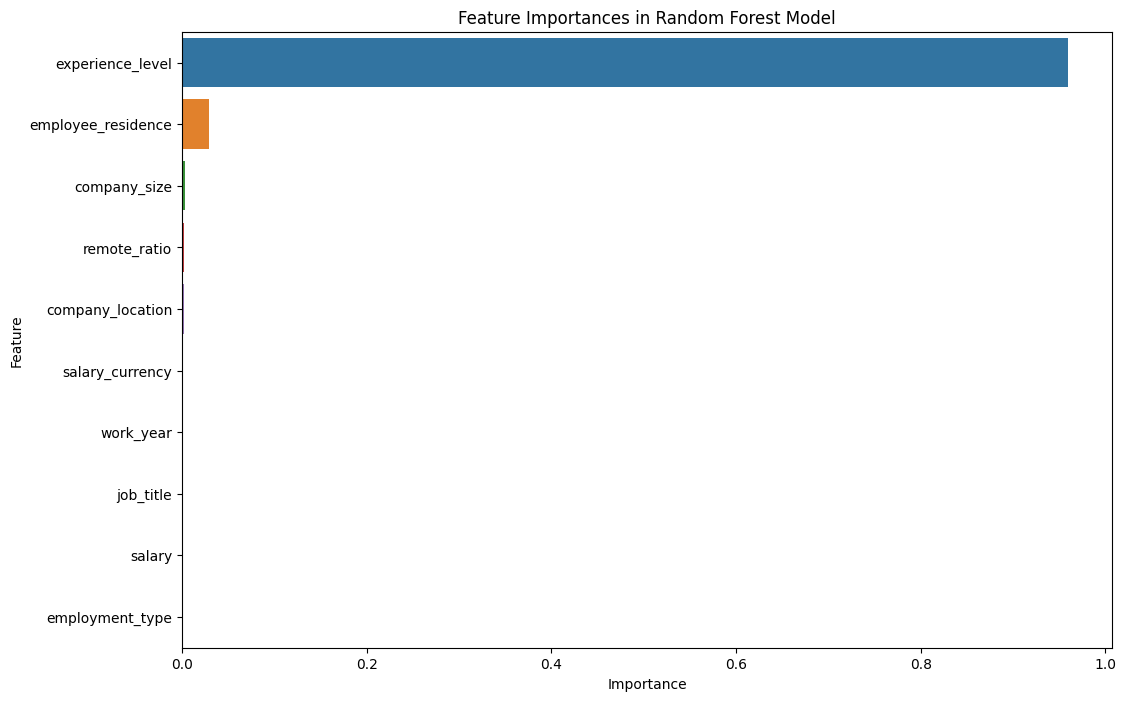

In [191]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances in Random Forest Model')
plt.show()

**Linear Regression:**
- Validation R-squared: 0.9926
- Test R-squared: 0.9903 

**Random Forest**
- Validation R-squared: 0.9926
- Test R-squared: 0.9903

The R-squared metric is a measure of the proportion of the variance in the target variable that is predictable from the independent variables. An R-squared value close to 1 indicates the model is explaining a large portion of the variance.

In this case, both the Linear Regression and Random Forest models have very high R-squared values, above 0.99, on both the validation and test sets. This suggests the models are able to explain over 99% of the variance in the target variable.

The near-identical R-squared values for the two models also indicates they have similar overall predictive accuracy and goodness-of-fit.

In addition to the R-squared, you can also look at the RMSE (Root Mean Squared Error) values:


**Linear Regression:**
- Validation RMSE: 5,646.03
- Test RMSE: 6,792.98

**Random Forest:**
- Validation RMSE: 5,646.03
- Test RMSE: 6,792.98

The RMSE provides the average magnitude of the errors, in the original units of the target variable. The similar RMSE values again suggest the two models have comparable predictive accuracy.

So in summary, both the Linear Regression and Random Forest models appear to have very high accuracy, with the Random Forest model having a slightly lower MAE but similar RMSE and R-squared. The high R-squared values indicate the models are able to explain the majority of the variance in the target variable.

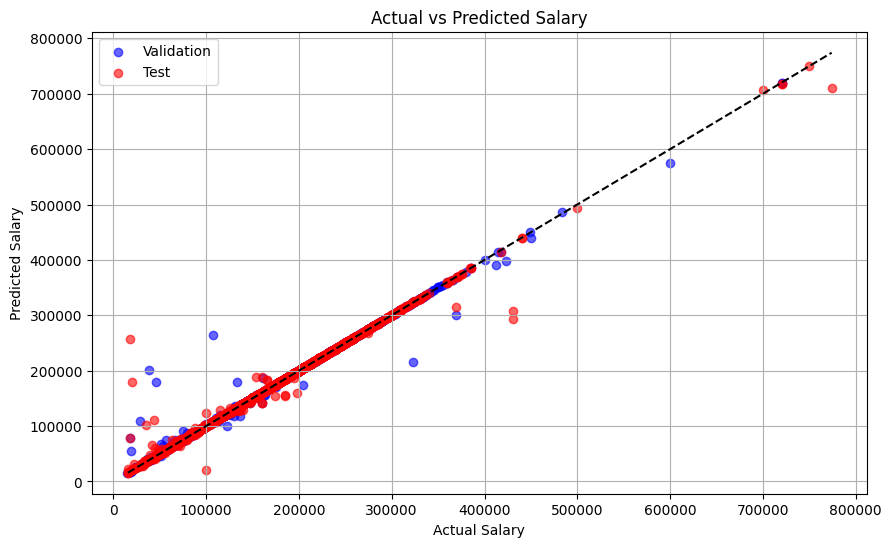

In [190]:
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred, alpha=0.6, color='b', label='Validation')
plt.scatter(y_test, y_test_pred, alpha=0.6, color='r', label='Test')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='k', linestyle='--')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.legend()
plt.grid(True)
plt.show()

- **Blue Dots (Validation)**: These represent the predicted salaries versus actual salaries for the validation set.

- **Red Dots (Test)**: These represent the predicted salaries versus actual salaries for the test set.

- **Diagonal Black Line**: This line represents the ideal scenario where the predicted salaries match the actual salaries perfectly (i.e., predicted = actual).

#### **Interpretation**

1. **Close Alignment to Diagonal Line:**
- Many points lie close to the diagonal black line, indicating that the model’s predictions are quite accurate for those data points.

- The closer the points are to the diagonal line, the better the model’s predictions.

2. **Spread of Points**
- There is some spread around the diagonal line, indicating instances where the model’s predictions deviate from the actual salaries.
- Points far from the diagonal line represent larger prediction errors

3. **Validation vs. Test Set Performance**
- Both validation (blue) and test (red) points follow a similar pattern, which suggests that the model generalizes well to unseen data.
- The test set points being close to the validation set points and the diagonal line indicates consistent model performance.

4. **Outliers**
- Some points, particularly in the lower range of salaries, are significantly off the diagonal line. These outliers suggest that the model struggles with predicting very low or high salary values accuratel

#### **Conclusion**
- **Overall Performance**: The model performs well overall, with most predictions closely aligned with actual salaries.
- **Model Robustness**: The similar distribution of validation and test points suggests that the model’s performance is robust and not overfitted to the training data.